
# DBSCAN: Density-based clustering algorithm.

Key idea: Groups points in high-density regions, labels low-density points as noise.

Parameters: Eps (neighborhood radius), MinPts (minimum points to form a cluster).

Advantages: Finds clusters of any shape, handles noise, no need to predefine cluster count.

In [1]:
# Libraries used
import pandas as pd           # For data loading and manipulation
import numpy as np            # For numerical operations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import DBSCAN                 # DBSCAN clustering
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("/content/Country-data.csv")

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

In [4]:
from sklearn.preprocessing import StandardScaler

# Drop non-numerical columns
df_numeric = df.drop(columns=['country'])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN parameters
eps = 1.5       # radius of neighborhood
min_samples = 3 # minimum points to form a dense region

# Fit DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
clusters = db.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Count clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters: 2
Number of noise points: 25


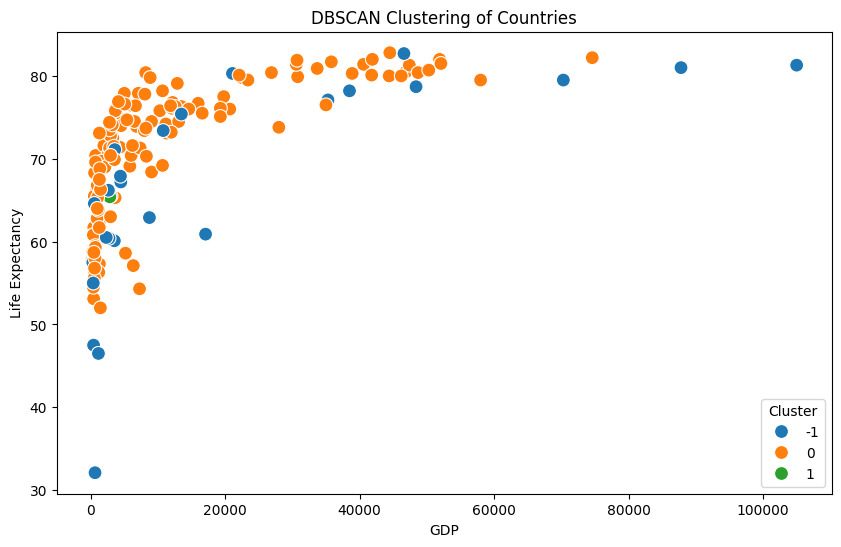

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='gdpp', y='life_expec', hue='Cluster', palette='tab10', s=100)
plt.title('DBSCAN Clustering of Countries')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(title='Cluster')
plt.show()


Most countries have low to mid GDP (0–50,000) and life expectancy between 60–80 years, forming the main cluster (0).

A few countries have very high GDP (>50,000) but still moderate life expectancy → may be labeled as outliers (-1).

Some very small or unusual countries may also appear as noise.